## Plot Figures 1 (map) 2 (timelines) 3 (spectra/ograms) 4 (specufoec workflow)

These depict the input data , preprocessing, SpecUFEx workflow

For Sawi et al., 2021 !


#### Todo

* Combine maps and data
* combine timings (hod, doy)

* XXmore fingerprint component figures for k-means 
* XXX split up timelines? / combine hourly timelines / overall simplify
* 


## big todo

* PANEL LABELS!!! and arrows 
* XXX more fingerprint component figures for k-means 
* photoshop workflow for reconstructing spectra
* components for workflow for reconstructing spectra
* photoshop workflow for specufex
* 2D PCA ... hmm maybe
* PCA by timelines, stats ... yes, think so....
* XXX split up waveforms and spectra 
* spectra -> ACM -> STM for IQ and NS ?


In [1]:
import os

import sys


import h5py

import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

from matplotlib import cm

import matplotlib.gridspec as gridspec

import matplotlib.image as mpimg

from scipy.io import loadmat


import datetime as dtt

import datetime



sys.path.append('.')
sys.path.append('./functions')

import paths



from functions2 import dateToEventID, getDailyTempDiff, getFeatures, getLocationFeatures,getNMFOrder,resortByNMF,getSpectra_fromWF,getSgram,PCAonFP,calcSilhScore,getSpectraMedian,CalcDiffPeak,PVEofPCA,getTopFCat,calcFFT, getWF, swapLabels,trimSpectra, KMeansSpectra, compileSpectraFromWF
import figureFunctions2



In [2]:
!pwd

/Users/theresasawi/Documents/SpecUFEx_v1/BB_Gorner_Event_Redo_v2/02_src


In [3]:


from functions2 import getFeatures, getLocationFeatures,getNMFOrder,resortByNMF,getSpectra_fromWF,getSgram
from functions2 import PCAonFP,calcSilhScore,getDailyTempDiff,getSpectraMedian,CalcDiffPeak,PVEofPCA,getTopFCat 
from functions2 import catMergeFromH5, swapLabels, calcFFT, getWF, swapLabels,trimSpectra, KMeansSpectra, compileSpectraFromWF
import figureFunctions2

## Set paths

In [4]:
#%% load project variables: names and paths
# key = sys.argv[1]

# key = "BB_Gorner_Event_Final_v11_J8"
key = "BB_Gorner_Event_Redo_v2"
keyN = "BB_Gorner_Cont_Redo_v5"


filetype = '.gse2'     
filetypeN = '.sac' 


p = paths.returnp(key)
pN = paths.returnp(keyN)

#%%

projName        = p['projName']
datasetID       = p['datasetID']
projName        = p['projName']
station         = p['station']
channel         = p['channel']
path_top        = p['path_top']
path_proj       = p['path_proj']
outfile_name    = p['outfile_name']
dataFile_name   = p['dataFile_name']
path_WF         = p['path_WF']
path_Cat        = p['path_Cat'] #original, raw catalog
subCatalog_Name = f"{dataFile_name}_Sgrams_Subcatalog.hdf5"



pathFP          = f'{path_top}{projName}/03_output/{station}/SpecUFEx_output/step4_FEATout/'
pathACM         = f'{path_top}{projName}/03_output/{station}/SpecUFEx_output/step2_NMF/'
pathSTM         = f'{path_top}{projName}/03_output/{station}/SpecUFEx_output/step4_stateTransMats/'
pathEB          = f'{path_top}{projName}/02_src/02_SpecUFEx/EB.mat'
pathElnB          = f'{path_top}{projName}/02_src/02_SpecUFEx/ElnB.mat'
pathW        = path_proj + '02_src/02_SpecUFEx/out.DictGain.mat' 


# pathClusCat = path_proj + f"principalDf_full_{mode}_Kopt{Kopt}.csv"
dataH5_path = path_proj + dataFile_name


projNameN        = pN['projName']
datasetIDN       = pN['datasetID']
projNameN        = pN['projName']
station          = pN['station']
channel          = pN['channel']


path_top         = pN['path_top']
path_projN       = pN['path_proj']
outfile_nameN    = pN['outfile_name']
dataFile_nameN   = pN['dataFile_name']
path_WFN         = pN['path_WF']
path_CatN        = pN['path_Cat'] #original, raw catalog
subCatalog_NameN = f"{dataFile_name}_Sgrams_Subcatalog.hdf5"


pathACMN         = f'{path_top}{projNameN}/03_output/{station}/SpecUFEx_output/step2_NMF/'
pathSTMN         = f'{path_top}{projNameN}/03_output/{station}/SpecUFEx_output/step4_stateTransMats/'
pathEBN          = f'{path_top}{projNameN}/02_src/02_SpecUFEx/EB.mat'
pathElnBN        = f'{path_top}{projNameN}/02_src/02_SpecUFEx/ElnB.mat'
pathWN           = path_projN + '02_src/02_SpecUFEx/out.DictGain.mat' 

path_WFN         = pN['path_WF']


# pathClusCatN = path_projN + f"principalDf_full_{mode}_Kopt{KoptN}.csv"
dataH5_pathN = path_projN + dataFile_nameN

pathFig = '../05_reports/figures/'
pathFigSupp = '../05_reports/supp_figures/'
pathAuxData = '../01_input/data/processed/Garcia/'

## Load auxiliary catalog

In [5]:
## Load auxiliary catalog

gps_station_list = ['24','34','36','37']
gps_df_list = []

for gst in gps_station_list:
    
    
    gps_df = pd.read_csv(f'{pathAuxData}gps_roll_Slopecorrected_{gst}.csv',index_col=0)
    gps_df['datetime'] = [pd.to_datetime(ii) for ii in gps_df.index]
    gps_df['datetime_index'] = [pd.to_datetime(ii) for ii in gps_df.index]
    gps_df = gps_df.set_index('datetime_index')
    
    
    gps_df_list.append(gps_df)


lake_df = pd.read_csv(f'{pathAuxData}lake_df.csv',index_col=0)
lake_df['datetime'] = [pd.to_datetime(ii) for ii in lake_df.index]
lake_df['datetime_index'] = [pd.to_datetime(ii) for ii in lake_df.index]
lake_df = lake_df.set_index('datetime_index')


meteor_df = pd.read_csv(f'{pathAuxData}meteor_df.csv',index_col=0)
meteor_df['datetime'] = [pd.to_datetime(ii) for ii in meteor_df.index]
meteor_df['datetime_index'] = [pd.to_datetime(ii) for ii in meteor_df.index]
meteor_df = meteor_df.set_index('datetime_index')

rain_df = meteor_df.rain


## Define some important times in study period

In [6]:
# timing of lake events 
tstart = dtt.datetime(2007, 6, 13)
tend = dtt.datetime(2007, 7, 23)
calvet = dtt.datetime(2007, 7, 1,13,41,35)
supraDraint = dtt.datetime(2007, 7, 4)
subDraint = dtt.datetime(2007, 7, 7)
drainEndt = dtt.datetime(2007, 7, 15)


## Load original catalogs

In [7]:
path_CatN, path_Cat,path_proj,path_projN,outfile_name




('/Users/theresasawi/Documents/SpecUFEx_v1/BB_Gorner_Cont_Redo_v5//01_input/J8/catalogs/catalog_G7J8Z.csv',
 '/Users/theresasawi/Documents/SpecUFEx_v1/BB_Gorner_Event_Redo_v2//01_input/J8/catalogs/catalog_G7J8Z.csv',
 '/Users/theresasawi/Documents/SpecUFEx_v1/BB_Gorner_Event_Redo_v2/',
 '/Users/theresasawi/Documents/SpecUFEx_v1/BB_Gorner_Cont_Redo_v5/',
 'SpecUFEx_out_BB_Gorner_Event_Redo_v2_all.hdf5')

In [8]:
path_Cat,path_proj,outfile_name

('/Users/theresasawi/Documents/SpecUFEx_v1/BB_Gorner_Event_Redo_v2//01_input/J8/catalogs/catalog_G7J8Z.csv',
 '/Users/theresasawi/Documents/SpecUFEx_v1/BB_Gorner_Event_Redo_v2/',
 'SpecUFEx_out_BB_Gorner_Event_Redo_v2_all.hdf5')

In [9]:
cat00 = catMergeFromH5(path_Cat,path_proj,outfile_name)
cat00N = catMergeFromH5(path_CatN,path_projN,outfile_nameN)




1457 events kept, merge sucessful
1472 events kept, merge sucessful


In [10]:
cat00

,date_index,evID,datenum,X_m,Y_m,Elevation_m,Depth_m,dX_m,dY_m,dElevation_m,dDepth_m,unk_01,unk_02,unk_03,year,event_ID,datetime,hourFrac
datetime_index,,,,,,,,,,,,,,,,,,
2007-06-14 09:30:58,2007-06-14 09:30:58,1.181813e+09,7.061409e+10,628139.402618,90878.914497,1649.029124,4.589989,5.784666,87.614947,0.918545,0.988216,9.0,15.0,15.0,2007.0,70614093058,2007-06-14 09:30:58,9.500000
2007-06-14 11:31:25,2007-06-14 11:31:25,1.181821e+09,7.061411e+10,628146.894109,90932.833023,1732.747269,2.863870,4.071201,85.679737,0.928718,0.982770,10.0,15.0,14.0,2007.0,70614113125,2007-06-14 11:31:25,11.516667
2007-06-14 12:03:56,2007-06-14 12:03:56,1.181823e+09,7.061412e+10,628247.748901,91013.828980,1511.430886,2.599893,3.224454,69.062104,0.942126,0.982547,6.0,15.0,7.0,2007.0,70614120356,2007-06-14 12:03:56,12.050000
2007-06-14 12:07:17,2007-06-14 12:07:17,1.181823e+09,7.061412e+10,628309.789731,90939.215981,1633.451413,2.994730,3.631903,48.732024,0.960321,0.992642,12.0,15.0,7.0,2007.0,70614120717,2007-06-14 12:07:17,12.116667
2007-06-14 12:10:58,2007-06-14 12:10:58,1.181823e+09,7.061412e+10,628319.329292,90988.119981,1669.018450,3.982404,5.801114,70.621535,0.906228,0.947903,7.0,15.0,8.0,2007.0,70614121058,2007-06-14 12:10:58,12.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-07-21 16:56:23,2007-07-21 16:56:23,1.185037e+09,7.072117e+10,628065.324771,90904.354867,1727.358954,11.075576,7.405400,81.273079,0.869248,0.910898,10.0,15.0,16.0,2007.0,70721165623,2007-07-21 16:56:23,16.933333
2007-07-21 17:11:34,2007-07-21 17:11:34,1.185038e+09,7.072117e+10,628069.692505,91027.210806,1631.508477,16.637161,9.133288,88.670999,0.931473,0.935527,6.0,15.0,16.0,2007.0,70721171134,2007-07-21 17:11:34,17.183333
2007-07-21 17:15:16,2007-07-21 17:15:16,1.185038e+09,7.072117e+10,628168.725360,90989.752816,1852.311624,2.703522,7.577456,161.545458,0.920582,0.944961,5.0,15.0,25.0,2007.0,70721171516,2007-07-21 17:15:16,17.250000


In [11]:
path_proj + dataFile_name

'/Users/theresasawi/Documents/SpecUFEx_v1/BB_Gorner_Event_Redo_v2/BB_Gorner_Event_Redo_v2_data.hdf5'

## Load station data

In [12]:
##station data 
stn = pd.read_csv("../01_input/data/raw/stnlst.csv",
                  header=None,
                  names=['name','X','Y','Elevation','dX','dY','Depth'])

        

## Get experiment parameters from H5 file

In [13]:
#########       #########       #########       #########       #########       #########       #########       #########       

####IQIQIQIQIQIQIQIQI

#########       #########       #########       #########       #########       #########       #########       #########       



with h5py.File(path_proj + dataFile_name,'r') as dataFile:

    lenData = dataFile['processing_info/'].get('lenData')[()]
    fs = dataFile['spec_parameters/'].get('fs')[()]
    
    # fmin = 
    nperseg = dataFile['spec_parameters/'].get('nperseg')[()]
    noverlap = dataFile['spec_parameters/'].get('noverlap')[()]
    nfft = dataFile['spec_parameters/'].get('nfft')[()]


    fmax = dataFile['spec_parameters/'].get('fmax')[()]
    fmax = np.ceil(fmax)
    fmin = dataFile['spec_parameters/'].get('fmin')[()]
    fmin = np.floor(fmin)    
#     fSTFT = dataFile['spec_parameters/'].get('fSTFT')[()]
#     tSTFT = dataFile['spec_parameters/'].get('tSTFT')[()]
    
    sgram_mode = dataFile['spec_parameters/'].get('mode')[()].decode('utf-8')
    scaling = dataFile['spec_parameters/'].get('scaling')[()].decode('utf-8')
    
with h5py.File(path_proj + outfile_name,mode='a') as sub_catalog_h5:
    fSTFT = sub_catalog_h5['spec_parameters/'].get('fSTFT')[()]
    tSTFT = sub_catalog_h5['spec_parameters/'].get('tSTFT')[()] 
    
        
fs = int(np.ceil(fs))
winLen_Sec = float(nperseg / fs)


#########       #########       #########       #########       #########       #########       #########       #########       

##### NOISENOISENOISENOISENOISE

#########       #########       #########       #########       #########       #########       #########       #########       


with h5py.File(path_projN + dataFile_nameN,'r') as dataFile:

    lenDataN = dataFile['processing_info/'].get('lenData')[()]
    fsN = dataFile['spec_parameters/'].get('fs')[()]
    
    # fminN = 
    npersegN = dataFile['spec_parameters/'].get('nperseg')[()]
    noverlapN = dataFile['spec_parameters/'].get('noverlap')[()]
    nfftN = dataFile['spec_parameters/'].get('nfft')[()]


    fmaxN = dataFile['spec_parameters/'].get('fmax')[()]
    fmaxN = np.ceil(fmaxN)
    fminN = dataFile['spec_parameters/'].get('fmin')[()]
    fminN = np.floor(fminN)    
    fSTFTN = dataFile['spec_parameters/'].get('fSTFT')[()]
    tSTFTN = dataFile['spec_parameters/'].get('tSTFT')[()]
    
    sgram_modeN = dataFile['spec_parameters/'].get('mode')[()].decode('utf-8')
    scalingN = dataFile['spec_parameters/'].get('scaling')[()].decode('utf-8')
    
    
fsN = int(np.ceil(fsN))
winLen_SecN = float(npersegN / fsN)



## Load specufex output

In [14]:
pathW

'/Users/theresasawi/Documents/SpecUFEx_v1/BB_Gorner_Event_Redo_v2/02_src/02_SpecUFEx/out.DictGain.mat'

In [15]:

#########       #########       #########       #########       #########       #########       #########       #########       

## specufex output - IQIQIQIQIQIQIQIQIQIQ
 
#########       #########       #########       #########       #########       #########       #########       #########       Wmat = loadmat(pathW)

## specufex parameters
Wmat = loadmat(pathW)
EBmat = loadmat(pathEB)

W = Wmat.get('W1')
EB = EBmat.get('EB')



numPatterns = len(W[1])
Nfreqs = len(W)
numStates = EB.shape[0]



order_swap = getNMFOrder(W,numPatterns)
W_new = resortByNMF(W,order_swap)
EB_new = resortByNMF(EB,order_swap)

RMM = W_new @ EB_new.T

#########       #########       #########       #########       #########       #########       #########       #########       

## specufex output - NOISENOISENOINSENOISE

#########       #########       #########       #########       #########       #########       #########       #########       


WmatN = loadmat(pathWN)
EBmatN = loadmat(pathEBN)

WN = WmatN.get('W1')
EBN = EBmatN.get('EB')



numPatternsN = len(WN[1])
NfreqsN = len(WN)
numStatesN = EBN.shape[0]


order_swapN = getNMFOrder(WN,numPatternsN)
W_newN = resortByNMF(WN,order_swapN)
EB_newN = resortByNMF(EBN,order_swapN)

RMMN = W_newN @ EB_newN.T

## Format day ticks, time plotting

* Central European Time is 2 hours later than UTC (Coordinated Universal Time) 
* Max temp occurs around 16:00 (4pm) local time or, 14:00 (2pm) UTC
* All times in UTC


todo: fix ::


##dummy variable -- just needed to get complete day set -- FIXFIX
clus_clu_perday = cat0.event_ID.resample('D', label='left', closed='right').count()

In [16]:


############################################################
            ##### FORMAT DAY TICKS (ASSUMES NO DAYS SKIPPED?) ######
############################################################
tstart = pd.to_datetime('2007-06-14 00:00:00')
tend   = pd.to_datetime('2007-07-22 00:00:00')



delta_day = 7

##dummy variable -- just needed to get complete day set -- FIXFIX
clus_clu_perday = cat00.event_ID.resample('D', label='left', closed='right').count()

numDays = len(clus_clu_perday)

days_list = [clus_clu_perday.index[i] for i in range(numDays)]


## these have lots of possible text formats
day_labels = [f"{days_list[d].month}-{days_list[d].date().day}" for d in range(0,len(days_list),delta_day)]

day_ticks = [days_list[d] for d in range(0,len(days_list),delta_day)]


# Central European Time is 2 hours later than UTC (Coordinated Universal Time)
##max temp is around 4pm local time or 16:00, in UTC it is 14:00 or 2pm
## start of

#all times in UTC
hour_of_approx_max_temp = 14
# hourMaxTemp = [dtt.datetime(2007, 6, 14,hour_of_approx_max_temp,0,0) + pd.DateOffset(i) for i in range(0,numDays)]


## ts 2021/08/07 : change line to start of day
dayStart = hourMaxTemp = [dtt.datetime(2007, 6, 14) + pd.DateOffset(i) for i in range(0,numDays)]

hour24labels = [str(r) for r in range(0,24)] #UTC

print(day_labels)
############################################################
############################################################

       

['6-14', '6-21', '6-28', '7-5', '7-12', '7-19']


In [17]:
plt.rcParams['image.cmap']='magma'

plt.rcParams.update({'font.size': 8})
colors =cm.Paired(np.array([1,5,7,9,2,4,6,8]))


## when plotting, add a bit of buffer so bars aren't cut off
tlimstart = pd.to_datetime('2007-06-13 12:00:00')
tlimend   = pd.to_datetime('2007-07-22 12:00:00')


lw1=4        
lw2=5
alphaT=1
ylabfont=8
ylabpad =10


plt_kwargs = {'lw1':lw1,
              'lw2':lw2,
              'alphaT':alphaT,
              'ylabfont':ylabfont,
              'ylabpad':ylabpad,
              'colors':colors,
              'scaling':scaling,
              'sgram_mode':sgram_mode,
              'hour24labels':hour24labels,
              'day_ticks':day_ticks,
              'day_labels':day_labels,
              'numDays':numDays,
              'hourMaxTemp':hourMaxTemp,
              'tstart':tlimstart, ## for extending x axis to fit bars
              'tend':tlimend,     ## for extending x axis to fit bars
              'tstartreal':tstart,## actual study bound
              'tendreal':tend     ## actual study bound
             }

## Specs for figures JGR

In [18]:
#quarter page
width1 = 3.74016
height1 = 4.52756

#full page
width2 = 7.48031
height2 = 9.05512

# Figure 1 - Icequake map with depth 

In [19]:
!pwd

/Users/theresasawi/Documents/SpecUFEx_v1/BB_Gorner_Event_Redo_v2/02_src


In [20]:
# img = mpimg.imread('swissmap.png')




In [21]:
!pwd

/Users/theresasawi/Documents/SpecUFEx_v1/BB_Gorner_Event_Redo_v2/02_src


## Swiss map inlay

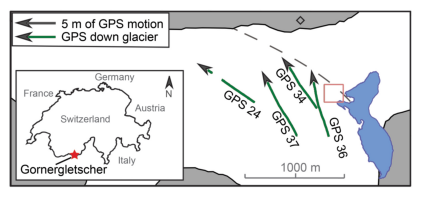

In [40]:
# img = mpimg.imread('map_CH.jpeg')
img_orig = mpimg.imread('Garcia_et_al_Fig1_for_Theresa.jpg')


fig,ax2 = plt.subplots(figsize = (width2,3.38))#,sharex=True,constrained_layout=True)
# plot Swiss map
ax2.imshow(img_orig)
ax2.axis('off')
plt.savefig(pathFig + 'swissmap.png',dpi=300)


## Put map inlay, enlarge map view, replace depths with a box plot...

In [41]:
width2

7.48031

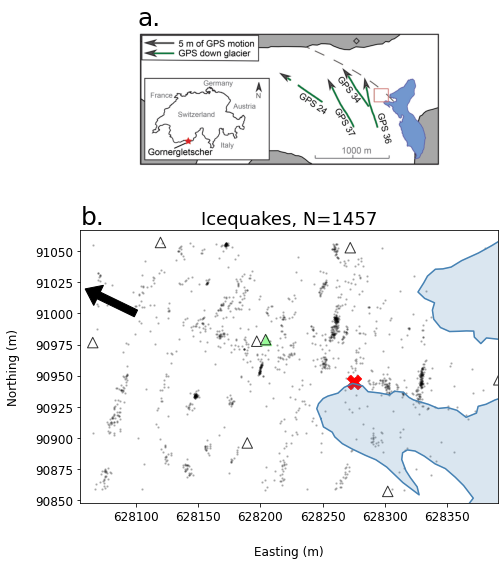

In [76]:
##v2
##settings for yellow bars
plt.rcParams.update({'font.size': 12})




fig,axes = plt.subplots(figsize = (width2,height2))#,sharex=True,constrained_layout=True)
gs = gridspec.GridSpec(3,1)





## plot Map of icequakes
ax = plt.subplot(gs[1:,:])    
figureFunctions2.plotMap(cat00,ax=ax,colorBy='all',size=2,alpha=.2,**plt_kwargs); #'cluster';'all';'datetime'
figureFunctions2.plotStations(stn,station,size=110,ax=ax)

##set map limits
buff = 10
ax.set_xlim(cat00.X_m.min()-buff,cat00.X_m.max()+buff)
ax.set_ylim(cat00.Y_m.min()-buff,cat00.Y_m.max()+buff)
ax.set_aspect('equal')


### ax.set_xticks([])
# ax.set_xticklabels('')

ax.set_ylabel('Northing (m)',labelpad=15,fontsize=12)

title = f'Icequakes, N={len(cat00)}'    
ax.set_title(title, pad=6,fontsize=18) 
ax.set_xlabel('Easting (m)',labelpad=22,fontsize=12)

## flow arrow
x = 628100
y = 91000
dx = -60 / 2
dy = 29 / 2
ax.arrow(x, y, dx, dy,color='k',width=6,head_length=12)



## plot approximate moulin location

mx = 628275
my = 90945
plt.scatter(mx,my,marker='X',s=200,color='r',label='Moulin')




###plot Swiss map
## img = plt.imread(pathFig + 'swissmap.png')
## img = plt.imread('map_CH.jpeg')
ax1 = plt.subplot(gs[0,:])
ax1.imshow(img_orig)
ax1.axis('off')

# newax = fig.add_axes([.4,0.8,0.2,0.2], anchor='NE', zorder=1)
# newax.imshow(img_orig)
# newax.axis('off')

atext = 25 

# ax.text(628055,91190,'a.',fontsize=atext)
# ax.text(628055,91070,'b.',fontsize=atext)
ax1.set_title('a.',fontsize=atext,loc='left')
ax.set_title('b.',fontsize=atext,loc='left')

gs.update(wspace=.4, hspace=0.3)


plt.savefig(pathFig + f'Figure_1.png',bbox_inches='tight',dpi=300)


In [69]:
pathFig

'../05_reports/figures/'

# Figure 2

In [25]:
dtf = pd.DateOffset(1) #offset pink labels above date bars
dailyTempDiff = getDailyTempDiff(meteor_df,**plt_kwargs)


./functions/functions2.py:391: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  temp_H = meteor_df1.temp.resample('H',loffset='30T').mean().ffill()
./functions/functions2.py:392: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  temp_D = meteor_df1.temp.resample('D',loffset='12H').mean().ffill()


# Season plot

## Combine 

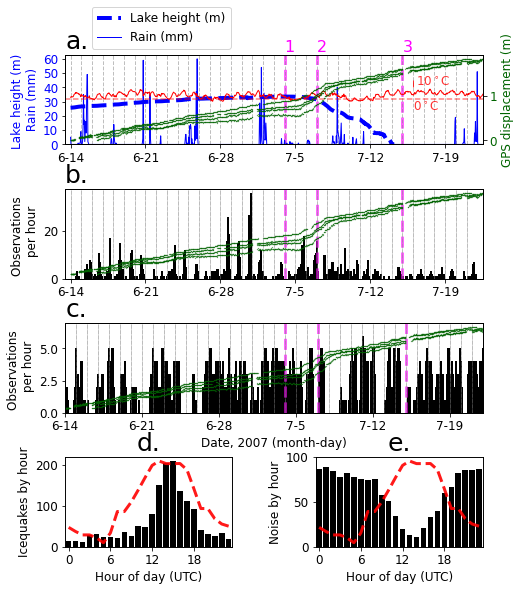

In [74]:
plt.figure(figsize=(width2,height2))
ax = plt.gca()

gs = gridspec.GridSpec(12,2)
gs.update(wspace=.5, hspace=100)

dtf = pd.DateOffset(0) #offset pink labels above date bars
Kopt=1

#title format
tpad = 5
tfont = 12

# bar width
bW = .2

## Labels and heights
title = f'              Icequakes, N={len(cat00)}'   
XX='IQ'#label for event line
ymax = 35
YY = 42
titleN = f'              Noise, N={len(cat00N)}'
XXN='NS'#label for event line
ymaxN = 17
YYN = 18 

## Plot aux geophyscial data
ax = plt.subplot(gs[0:3,:])


## plot temp
figureFunctions2.plotTemp(meteor_df.temp,ax=ax,**plt_kwargs)  

# pink lines for drainage stages
ax.axvline(supraDraint,color='fuchsia',ls='--',linewidth=3,alpha=.6)
ax.axvline(subDraint,color='fuchsia',ls='--',linewidth=3,alpha=.6)
ax.axvline(drainEndt,color='fuchsia',ls='--',linewidth=3,alpha=.6)

# text for drainage
yy = 64
fonts = 16
ax.text(supraDraint,yy+1,'1',color='fuchsia',fontsize=fonts,alpha=1)
ax.text(subDraint,yy+1,'2',color='fuchsia',fontsize=fonts,alpha=1)
ax.text(drainEndt,yy+1,'3',color='fuchsia',fontsize=fonts,alpha=1)

# day lines
for i in range(numDays):
    ax.axvline(hourMaxTemp[i],c='gray',linestyle='--',linewidth=1,alpha=.5)

    

# lake and rain
label='Lake height (m)'
labelR = 'Rain (mm)'
ax.set_ylabel('Lake height (m) \n Rain (mm) ',color='b')
ax.set_yticks(np.arange(0,61,10))
ax.set_yticklabels([f'{a:.0f}' for a in np.arange(0,61,10)])
[t.set_color('b') for t in ax.yaxis.get_ticklabels()]
ax.plot(lake_df.lake,c='b',lw=4,ls='--',label=label)

rain10 = rain_df * 10 #convert cm to mm
ax.plot(rain10,c='b',label=labelR,lw=1)
ax.set_xticks(day_ticks)
ax.set_xticklabels(day_labels)

## legend
ax.legend(bbox_to_anchor=(.05,1))

#xlabel
ax.set_xlabel('')
ax.set_xlim(tstart,tend)


#gps displ
for i, gps_dff in enumerate(gps_df_list):
    if i==0:
        figureFunctions2.plotGPS(gps_dff.gps_roll,size=.5,ax=ax,**plt_kwargs)
    else:
        figureFunctions2.plotGPS(gps_dff.gps_roll,size=.5,ylabel='none',ax=ax,**plt_kwargs)


# ax.set_xlabel('')   
# ax.set_xticklabels('')   

ax.set_ylim(ymin=0)


ax.set_title('a.',fontsize=atext,loc='left')

### ### ### ICEQUAKES ### ### ### 
### ### ### ICEQUAKES ### ### ### 
### ### ### ICEQUAKES ### ### ### 
### ### ### ICEQUAKES ### ### ### 
### ### ### ICEQUAKES ### ### ### 



## Bar plot, Temp and Lake/Precip
ax = plt.subplot(gs[3:6,:])

#lines for drainage
ax.axvline(supraDraint,color='fuchsia',ls='--',linewidth=3,alpha=.6)
ax.axvline(subDraint,color='fuchsia',ls='--',linewidth=3,alpha=.6)
ax.axvline(drainEndt,color='fuchsia',ls='--',linewidth=3,alpha=.6)

# ax.set_ylim(0,ymax)
ax.set_xlabel('Date, 2007 (month-day)',labelpad=6)
ax.set_xlim(tstart,tend)

figureFunctions2.plotBar(cat00,Kopt,barWidth=bW,timeBin='H',byCluster=False,ax=ax,**plt_kwargs)

for i, gps_dff in enumerate(gps_df_list):
    if i==0:
        figureFunctions2.plotGPS(gps_dff.gps_roll,size=.5,ylabel='none',ax=ax,**plt_kwargs)
    else:
        figureFunctions2.plotGPS(gps_dff.gps_roll,size=.5,ylabel='none',ax=ax,**plt_kwargs)

for i in range(numDays):
    ax.axvline(hourMaxTemp[i],c='gray',linestyle='--',linewidth=1,alpha=0.3) 

    YY = 39


ax.set_title(title, pad=tpad,fontsize=tfont,loc='left')
ax.set_xlabel('')   
# ax.set_xticklabels('')   
ax.set_ylim(0,38)

ax.set_title('b.',fontsize=atext,loc='left')    
### ### ### NOISE ### ### ### 
### ### ### NOISE ### ### ### 
### ### ### NOISE ### ### ### 
### ### ### NOISE ### ### ### 
### ### ### NOISE ### ### ### 

## Bar plot, Temp and Lake/Precip
ax = plt.subplot(gs[6:9,:])

#gps displ
for i, gps_dff in enumerate(gps_df_list):
    if i==0:
        figureFunctions2.plotGPS(gps_dff.gps_roll,size=.5,ax=ax,ylabel='none',**plt_kwargs)
    else:
        figureFunctions2.plotGPS(gps_dff.gps_roll,size=.5,ylabel='none',ax=ax,**plt_kwargs)


#lines for drainage
ax.axvline(supraDraint,color='fuchsia',ls='--',linewidth=3,alpha=.6)
ax.axvline(subDraint,color='fuchsia',ls='--',linewidth=3,alpha=.6)
ax.axvline(drainEndt,color='fuchsia',ls='--',linewidth=3,alpha=.6)

figureFunctions2.plotBar(cat00N,1,barWidth=bW,timeBin='H',byCluster=False,ax=ax,**plt_kwargs)


for i in range(numDays):
    ax.axvline(hourMaxTemp[i],c='gray',linestyle='--',linewidth=1,alpha=0.3) 

    
 # ax.set_ylim(0,ymaxN)
ax.set_xlabel('Date, 2007 (month-day)',labelpad=4)
ax.set_xlim(tstart,tend)


   
YYN = 7.2     
ax.set_title(titleN, pad=tpad,fontsize=tfont,loc='left')
ax.set_ylim(0,7)

ax.set_title('c.',fontsize=atext,loc='left')


########################
#### Icequakes by hour
########################

ax = plt.subplot(gs[9:,0])
figureFunctions2.plotHourBar(cat00,1,dailyTempDiff,ax=ax,label='none',labelpad=10,**plt_kwargs)
ax.set_xlabel('')
ax.set_xlabel('Hour of day (UTC)')
ax.set_yticks([0,100,200])
ax.set_yticklabels(['0','100','200'])
ax.set_ylabel('Icequakes by hour')

########################
#### Noise by hour
########################

ax2 = plt.subplot(gs[9:,1])
ax2.set_ylabel('Noise by hour')
figureFunctions2.plotHourBar(cat00N,1,dailyTempDiff,ax=ax2,label='none',labelpad=10,**plt_kwargs)
ax2.set_xlabel('Hour of day (UTC)')
ax2.set_yticks([0,50,100])
ax2.set_yticklabels(['0','50','100'])


## text labels
atext = 25 
# ax.text(-3,1175,'a.',fontsize=atext)
# ax.text(-3,850,'b.',fontsize=atext)
# ax.text(-3,530,'c.',fontsize=atext)
# ax.text(0,155,'d.',fontsize=atext)
# ax2.text(0,70,'e.',fontsize=atext,color='w')

ax.set_title('d.',fontsize=atext)#,loc='left')
ax2.set_title('e.',fontsize=atext)#,loc='left')


plt.savefig(pathFig + f'02_timing.png',dpi=300,bbox_inches='tight')

## Figure 3 -- REDO? 

* Calc full (0-500Hz) means for all spectra


In [27]:
fmin,fmax,nfft,tSTFT

(15.0,
 80.0,
 4096,
 array([ 0.04,  0.1 ,  0.16,  0.22,  0.28,  0.34,  0.4 ,  0.46,  0.52,
         0.58,  0.64,  0.7 ,  0.76,  0.82,  0.88,  0.94,  1.  ,  1.06,
         1.12,  1.18,  1.24,  1.3 ,  1.36,  1.42,  1.48,  1.54,  1.6 ,
         1.66,  1.72,  1.78,  1.84,  1.9 ,  1.96]))

In [28]:
def getSpectra_fromWF2(evID,dataH5_path,station,channel,normed=True):
## get WF from H5 and calc full sgram for plotting

    with h5py.File(dataH5_path,'r') as dataFile:

        wf_data = dataFile[f'waveforms/{station}/{channel}'].get(str(evID))[:]


        fs = dataFile['spec_parameters/'].get('fs')[()]

        # fmin =
        nperseg = dataFile['spec_parameters/'].get('nperseg')[()]
        noverlap = dataFile['spec_parameters/'].get('noverlap')[()]
        nfft = dataFile['spec_parameters/'].get('nfft')[()]


        fmax = dataFile['spec_parameters/'].get('fmax')[()]
        fmax = np.ceil(fmax)
        fmin = dataFile['spec_parameters/'].get('fmin')[()]
        fmin = np.floor(fmin)
#         fSTFT = dataFile['spec_parameters/'].get('fSTFT')[()]
#         tSTFT = dataFile['spec_parameters/'].get('tSTFT')[()]

        sgram_mode = dataFile['spec_parameters/'].get('mode')[()].decode('utf-8')
        scaling = dataFile['spec_parameters/'].get('scaling')[()].decode('utf-8')


    fs = int(np.ceil(fs))

    fSTFT, tSTFT, STFT_0 = scipy.signal.spectrogram(x=wf_data,
                                                fs=fs,
                                                nperseg=nperseg,
                                                noverlap=noverlap,
                                                #nfft=Length of the FFT used, if a zero padded FFT is desired
                                                nfft=nfft,
                                                scaling=scaling,
                                                axis=-1,
                                                mode=sgram_mode)

    if normed:
        STFT_norm = STFT_0 / np.median(STFT_0)  ##norm by median
    else:
        STFT_norm = STFT_0
    STFT_dB = 20*np.log10(STFT_norm, where=STFT_norm != 0)  ##convert to dB
    STFT_dB = STFT_dB + np.abs(STFT_dB.min())
    
    specMat = np.maximum(0, STFT_dB) #make sure nonnegative
    specMatsum = specMat.sum(1)


    return specMatsum,specMat,fSTFT,wf_data,STFT_0,STFT_dB

In [114]:
def getSpectra_fromWF3(evID,fs,fmin,fmax,dataH5_path,station,channel,normed=True):
## get WF from H5 and calc full sgram for plotting

    with h5py.File(dataH5_path,'r') as dataFile:

        wf_data = dataFile[f'waveforms/{station}/{channel}'].get(str(evID))[:]
#         fmax = dataFile['spec_parameters/'].get('fmax')[()]
#         fmin = dataFile['spec_parameters/'].get('fmin')[()]

        
        
#     fmin = np.floor(fmin)
#     fmax = np.ceil(fmax)

    rollingf, rollingFFT =  calcFFT(wf_data,len(wf_data),fs,roll=100)
    
    if normed:
        rollingFFT = rollingFFT / np.median(rollingFFT)  ##norm by median
    else:
        rollingFFT = rollingFFT
        
    return rollingFFT, rollingf

In [111]:
import scipy

# Calc spectra from FFT

In [127]:
calcSpectra = 1
if calcSpectra:
    list_rand_specMatsum = []
    for j,evID in enumerate(cat00.event_ID.iloc):
#     for j,evID in enumerate(cat00.event_ID):
#         try:
        rollingFFT, rollingf = getSpectra_fromWF3(int(evID),fs,fmin,fmax,dataH5_path,station,channel,normed=True)

        if j == 0:
            rollingFFT_sum = np.zeros(len(rollingFFT))
            rollingFFT_med = np.zeros(len(rollingFFT))

#             ax.plot(fSTFT2,specMatsum,alpha=.01,c='darkgray')


        rollingFFT_sum += rollingFFT

        rollingFFT_med = np.vstack([rollingFFT_med,rollingFFT])
#         except:
#             continue




    print(j+1)
    rollingFFT_med = np.median(rollingFFT_med,axis=0)
    sstd = np.std(rollingFFT_med,axis=0)



    list_rand_specMatsumN = []
    for jN,evID in enumerate(cat00N.event_ID.iloc):
        
        try:
            rollingFFTN, rollingfN = getSpectra_fromWF3(int(evID),fs,fminN,fmaxN,dataH5_pathN,station,channel,normed=True)

            if jN == 0:
                rollingFFT_sumN = np.zeros(len(rollingFFTN))
                rollingFFT_medN = np.zeros(len(rollingFFTN))

#             ax.plot(fSTFT2N,specMatsumN,alpha=.01,c='darkgray')


            rollingFFT_sumN += rollingFFTN

            rollingFFT_medN = np.vstack([rollingFFT_medN,rollingFFTN])
        except:
            continue

    print(jN+1)
    rollingFFT_medN = np.median(rollingFFT_medN,axis=0)
    sstdN = np.std(rollingFFT_medN,axis=0)



1457
1472


# Calc spectra from summing spectrograms 

In [117]:
# calcSpectra = 1
# if calcSpectra:
#     list_rand_specMatsum = []
#     for j,evID in enumerate(cat00.event_ID.iloc):
# #     for j,evID in enumerate(cat00.event_ID):
# #         try:
#         specMatsum,specMat,fSTFT2,wf_data,STFT_0,STFT_dB = getSpectra_fromWF2(int(evID),dataH5_path,station,channel,normed=True)

#         if j == 0:
#             specMatsum_sum = np.zeros(len(specMatsum))
#             specMatsum_med = np.zeros(len(specMatsum))

# #             ax.plot(fSTFT2,specMatsum,alpha=.01,c='darkgray')


#         specMatsum_sum += specMatsum

#         specMatsum_med = np.vstack([specMatsum_med,specMatsum])
# #         except:
# #             continue




#     print(j+1)
#     specMatsum_mean = specMatsum_sum / (j+1)
#     specMatsum_med = np.median(specMatsum_med,axis=0)
#     sstd = np.std(specMatsum_med,axis=0)



#     list_rand_specMatsumN = []
#     for jN,evID in enumerate(cat00N.event_ID.iloc):
# #     for jN,evID in enumerate(cat00N.event_ID):
        
#         try:
#             specMatsumN,specMatN,fSTFT2N,wf_dataN,STFT_0N,STFT_dBN = getSpectra_fromWF2(evID,dataH5_pathN,station,channel,normed=True)

#             if jN == 0:
#                 specMatsum_sumN = np.zeros(len(specMatsumN))
#                 specMatsum_medN = np.zeros(len(specMatsumN))

# #             ax.plot(fSTFT2N,specMatsumN,alpha=.01,c='darkgray')


#             specMatsum_sumN += specMatsumN

#             specMatsum_medN = np.vstack([specMatsum_medN,specMatsumN])
#         except:
#             continue

#     print(jN+1)
#     specMatsum_meanN = specMatsum_sumN / (jN+1)
#     specMatsum_medN = np.median(specMatsum_medN,axis=0)
#     sstdN = np.std(specMatsum_medN,axis=0)



## show waveforms, not spectra

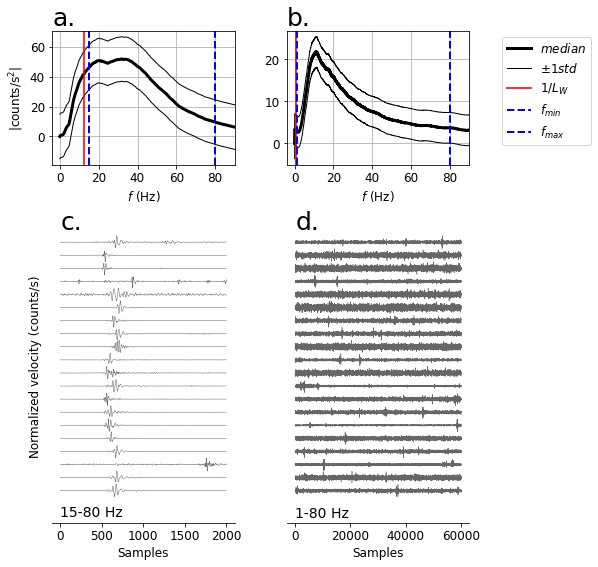

In [132]:

plt.rcParams.update({'font.size': 12})


fig,axes = plt.subplots(figsize = (width2,height1*2))#,sharex=True,constrained_layout=True)
gs = gridspec.GridSpec(6, 6)
gs.update(wspace=2, hspace=1)




lw=1
alpha=1


tfont=15
flabel1 = 60

FS = 14#font size for fmin and fmax
ymax = 1800
ymaxN = 3500



#### ICEQUAKE waveforms 

axs = plt.subplot(gs[2:,0:3],ymargin=.1)


Nids = 20

rand_ev = list(np.random.choice(cat00.event_ID,Nids,replace=False))

for i, evID in enumerate(rand_ev):


    wf = getWF(str(evID),dataH5_path,station,channel,fmin,fmax,fs)

    #Norm by max and zero mean
    wf_norm = wf / np.max(np.abs(wf))
    wf_zeromean = wf_norm - np.mean(wf_norm)
    
    offset = 2
    wf_offset = (wf_zeromean) + i*offset#1.5
        ##plot !!

    plt.plot(wf_offset,lw=.5,alpha=.6,c='k')

        

datte = str(pd.to_datetime('200' + str(evID)).date())[2:]
timme = str(pd.to_datetime('200' + str(evID)).time())


axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.spines['bottom'].set_visible(False)    
axs.set_yticks([]) 
axs.set_yticklabels([])     
axs.set_xlabel('Samples',labelpad=4)


axs.text(0,40,'c.',fontsize=atext)



axs.set_ylabel('Normalized velocity (counts/s)',labelpad=10)
axs.text(-2,-4,f'{int(fmin)}-{int(fmax)} Hz',fontsize=14)
axs.spines['bottom'].set_visible(True)    


#### waveforms NOISE

axs = plt.subplot(gs[2:,3:],ymargin=.1)


Nids = 20

rand_ev = list(np.random.choice(cat00N.event_ID,Nids,replace=False))

for i, evID in enumerate(rand_ev):


    wf = getWF(str(evID),dataH5_pathN,station,channel,fminN,fmaxN,fsN)

    #Norm by max and zero mean
    wf_norm = wf / np.max(np.abs(wf))
    wf_zeromean = wf_norm - np.mean(wf_norm)
    
    offset = 2
    wf_offset = (wf_zeromean) + i*offset#1.5
        ##plot !!

    plt.plot(wf_offset,lw=.5,alpha=.6,c='k')

        

datte = str(pd.to_datetime('200' + str(evID)).date())[2:]
timme = str(pd.to_datetime('200' + str(evID)).time())


axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.spines['bottom'].set_visible(False)    
axs.set_yticks([]) 
axs.set_yticklabels([])     
axs.set_xlabel('Samples',labelpad=4)


# axs.set_ylabel('Normalized velocity',labelpad=10)
axs.text(-2,-4,f'{int(fminN)}-{int(fmaxN)} Hz',fontsize=14)
axs.spines['bottom'].set_visible(True)  





axs.text(0,40,'d.',fontsize=atext)





## Medians
ax = plt.subplot(gs[0:2,0:3])

# ax.set_ylabel('20*log10(|m/s$^2$|$^2$)')
ax.set_ylabel('|counts/s$^2$|')

ax.plot(rollingf,rollingFFT_med,c='k',label='$median$',lw=3)
ax.plot(rollingf,rollingFFT_med+sstd,c='k',label='$\pm1 std$',lw=1)
ax.plot(rollingf,rollingFFT_med-sstd,c='k',lw=1)

ax.axvline(x=1/winLen_Sec,color='r',label='$1/L_{W}$',lw=2,alpha=.8)  

# plt.yscale('log')
# plt.xscale('log')
ax.axvline(x=fmin,color='blue',ls='--',lw=2)
ax.axvline(x=fmax,color='blue',ls='--',lw=2)
# ax.text(fmin+1, flabel1,'$f_{min}$',c='b',fontsize=FS)
# ax.text(fmax-15, flabel1,'$f_{max}$',c='b',fontsize=FS)


ax.set_xlabel('$f$ (Hz)')
# # ax.set_xlim(-5,300)
ax.set_xlim(fminN-5,fmax+10)
# ax.set_ylim(0,2000)
# ax.set_yticklabels(['500','1000','1500','2000'])
# ax.set_yticks([500,1000,1500,2000])     


# ax.legend(loc='upper right',bbox_to_anchor=(1,1))
# ax.set_title('Icequakes',pad=tpad,fontsize=tfont)
# ax.xaxis.set_label_position('top') 
# ax.xaxis.tick_top()
plt.grid()
ax.set_title('a.',fontsize=atext,loc='left',pad=0)


###### NOISE #####

## Bar plot, Temp and Lake/Precip
ax = plt.subplot(gs[0:2,3:])



ax.plot(rollingfN,rollingFFT_medN,c='k',label='$median$',lw=3)
ax.plot(rollingfN,rollingFFT_medN+sstdN,c='k',label='$\pm1 std$',lw=1)
ax.plot(rollingfN,rollingFFT_medN-sstdN,c='k',lw=1)




flabel1N = flabel1
# ax.text(fminN+2, flabel1N,'$f_{min}$',c='b',fontsize=FS)
# ax.text(fmaxN-15, flabel1N,'$f_{max}$',c='b',fontsize=FS)
ax.axvline(x=1/winLen_SecN,color='r',label='$1/L_{W}$',lw=2,alpha=.8)  

ax.axvline(x=fminN,color='blue',ls='--',lw=2,label='$f_{min}$')
ax.axvline(x=fmaxN,color='blue',ls='--',lw=2,label='$f_{max}$')

ax.set_title('b.',fontsize=atext,loc='left', pad=0)


ax.set_xlabel('$f$ (Hz)')
# # ax.set_xlim(-5,300)
ax.set_xlim(fminN-5,fmaxN+10)
# ax.set_ylim(0,2000)
# ax.set_yticklabels(['500','1000','1500','2000'])
# ax.set_yticks([500,1000,1500,2000])     


ax.legend(loc='upper right',bbox_to_anchor=(1.7,1))
# ax.set_title('Noise',pad=tpad,fontsize=tfont)
# plt.yscale('log')
# plt.xscale('log')

# ax.xaxis.set_label_position('top') 
# ax.xaxis.tick_top()
plt.grid()



plt.savefig(pathFig + f'4_inputData.png',dpi=300,bbox_inches='tight')

# Figure 4 - SpecUFEx Workflow and Reconstructing Spectra

## Workflow components (assemble in photoshop)

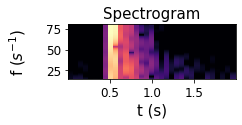

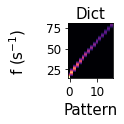

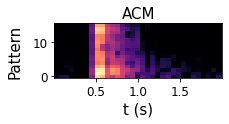

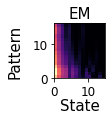

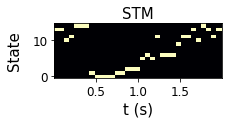

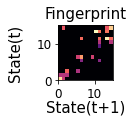

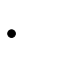

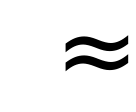

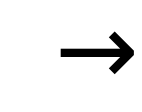

In [95]:
## Plot components 


evID = '70620173028'
LFS = 15

##SGram
fig,ax = plt.subplots(figsize = (width2//2,height1//4))#,sharex=True,constrained_layout=True)
specMat,x = getSgram(path_proj,evID,station)
plt.pcolormesh(tSTFT, fSTFT, specMat,cmap=cm.magma, shading='auto')
# date_title = str(pd.to_datetime('200' + evID))
ax.set_ylabel('f ($s^{-1}$)',rotation=90,labelpad=18,fontsize=LFS)
ax.set_title('Spectrogram',pad=tpad+1,fontsize=tfont)
ax.set_xlabel('t (s)',fontsize=LFS)
plt.savefig(pathFig + f'sgram.png',bbox_inches='tight',dpi=300)



### NMF Dict
fig,ax = plt.subplots(figsize = (width2//4,height1//4))#,sharex=True,constrained_layout=True)
ax.set_title('Dict',pad=tpad,fontsize=tfont)
figureFunctions2.plotW(W_new,numPatterns,fSTFT,aspect=.3,ax=ax)
ax.set_ylabel('f (s$^{-1}$)',rotation=90,labelpad=18,fontsize=LFS)
ax.set_xlabel('Pattern',fontsize=LFS)
plt.savefig(pathFig + f'NMF_Dict.png',bbox_inches='tight',dpi=300)

##ACM
fig,ax = plt.subplots(figsize = (width2//2,height1//4))#,sharex=True,constrained_layout=True)
ax.set_title('ACM',pad=tpad,fontsize=tfont)
figureFunctions2.plotACM(evID, pathACM, order_swap,tSTFT,numPatterns,ax=ax)
ax.set_ylabel('Pattern',rotation=90,labelpad=10,fontsize=LFS)
ax.set_xlabel('t (s)',fontsize=LFS)
plt.savefig(pathFig + f'ACM.png',bbox_inches='tight',dpi=300)



##EM
fig,ax = plt.subplots(figsize = (width2//4,height1//4))#,sharex=True,constrained_layout=True)
figureFunctions2.plotEB(EB_new,aspect=1,ax=ax)
ax.set_title('EM',pad=tpad,fontsize=tfont)
ax.set_xlabel('State',labelpad=0,fontsize=LFS)
ax.set_ylabel('Pattern',rotation=90,labelpad=10,fontsize=LFS)
plt.savefig(pathFig + f'EM.png',bbox_inches='tight',dpi=300)


##STM
fig,ax = plt.subplots(figsize = (width2//2,height1//4))#,sharex=True,constrained_layout=True)
figureFunctions2.plotSTM(evID, pathSTM,tSTFT,ax=ax)
ax.set_title('STM',pad=tpad,fontsize=tfont)
ax.set_ylabel('State',rotation=90,labelpad=10,fontsize=LFS)
ax.set_xlabel('t (s)',fontsize=LFS)
plt.savefig(pathFig + f'STM.png',bbox_inches='tight',dpi=300)




##FP
fig,ax = plt.subplots(figsize = (width2//4,height1//4))#,sharex=True,constrained_layout=True)
ax.set_title('Fingerprint',pad=tpad+2,fontsize=tfont)
figureFunctions2.plotFP(path_proj,outfile_name,evID,ax=ax)
ax.set_aspect('equal')
ax.set_ylabel('State(t)',rotation=90,labelpad=14,fontsize=LFS)
ax.set_xlabel('State(t+1)',rotation=0,labelpad=0,fontsize=LFS)
plt.savefig(pathFig + f'fp.png',bbox_inches='tight',dpi=300)



###Math symbols
fig,ax = plt.subplots(figsize = (width2//4,height1//4))#,sharex=True,constrained_layout=True)
circle1 = plt.Circle((0.08, 0.5), 0.07, color='k')
ax.add_patch(circle1)
ax.set_aspect('equal')
ax.axis('off')
plt.savefig(pathFig + f'dot.png',bbox_inches='tight',dpi=300)



fig,ax = plt.subplots(figsize = (width2//4,height1//4))#,sharex=True,constrained_layout=True)
ax.text(.5,.4,r'$\approx$',fontsize=100)
ax.axis('off')
plt.savefig(pathFig + f'approx.png',bbox_inches='tight',dpi=300)


fig,ax = plt.subplots(figsize = (width2//4,height1//4))#,sharex=True,constrained_layout=True)
ax.text(.5,.4,r'$\rightarrow$',fontsize=100)
ax.axis('off')
plt.savefig(pathFig + f'arrow.png',bbox_inches='tight',dpi=300)




/Users/theresasawi/opt/anaconda3/envs/seismo2/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/Users/theresasawi/opt/anaconda3/envs/seismo2/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


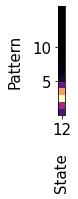

In [96]:
##EM
fig,ax = plt.subplots(figsize = (width2//2,height1//2))#,sharex=True,constrained_layout=True)
figureFunctions2.plotEB(EB_new[11:12],aspect=1,ax=ax)
# ax.set_title('EM',pad=tpad,fontsize=tfont)
ax.set_xlabel('State',labelpad=15,fontsize=LFS,rotation=90)
ax.set_xticklabels(['12'],fontsize=LFS)
ax.set_xticks([0.5])

ax.set_yticklabels([5,10],fontsize=LFS)
ax.set_yticks([5,10])

plt.yticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees

ax.set_ylabel('Pattern',rotation=90,labelpad=10,fontsize=LFS)
plt.savefig(pathFig + f'EM_slice11_rotX.png',bbox_inches='tight',dpi=300)


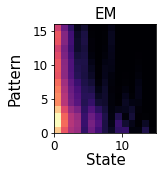

In [97]:
LFS = 15
##EM
fig,ax = plt.subplots(figsize = (width2//2,height1//2))#,sharex=True,constrained_layout=True)
figureFunctions2.plotEB(EB_new,aspect=1,ax=ax)
ax.set_title('EM',pad=tpad,fontsize=tfont)
ax.set_xlabel('State',labelpad=0,fontsize=LFS)
ax.set_ylabel('Pattern',rotation=90,labelpad=10,fontsize=LFS)
plt.savefig(pathFig + f'EM.png',bbox_inches='tight',dpi=300)


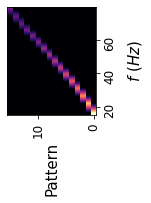

In [98]:
### NMF Dict
fig,ax = plt.subplots(figsize = (width2//2,height1//2))#,sharex=True,constrained_layout=True)
# ax.set_title('Dict',pad=tpad,fontsize=tfont,rotation=90)
figureFunctions2.plotW(W_new,numPatterns,fSTFT,aspect=.3,ax=ax)
ax.set_ylabel('$f \ (Hz)$',rotation=90,labelpad=10,fontsize=LFS)
ax.set_xlabel('Pattern',fontsize=LFS,rotation=90)
plt.xticks(rotation = 90)


ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.yticks(rotation = 90)

ax.invert_xaxis() 

plt.savefig(pathFig + f'NMF_Dict_rot.png',bbox_inches='tight',dpi=300)


In [99]:
def getWFFromFile(evID,path_WF,fmin, fmax, fs):
    
    wf = obspy.read(path_WF + str(evID) + '.sac')
    wf_data = wf[0]
    wf_filter = butter_bandpass_filter(wf_data, fmin,fmax,fs,order=4)
    wf_zeromean = wf_filter - np.mean(wf_filter)

    return wf_zeromean    

# plot wf over time

In [100]:
import obspy
from scipy.signal import butter, lfilter


def butter_bandpass(fmin, fmax, fs, order=5):
    nyq = 0.5 * fs
    low = fmin / nyq
    high = fmax / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, fmin, fmax, fs, order=5):
    b, a = butter_bandpass(fmin, fmax, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [101]:
wf_stack = np.array([])
for evID in cat00N.event_ID[0:-1:10]:
    wf = getWFFromFile(evID,path_WFN,fminN, fmaxN, fsN)
    
    wf_stack = np.hstack([wf_stack,wf])

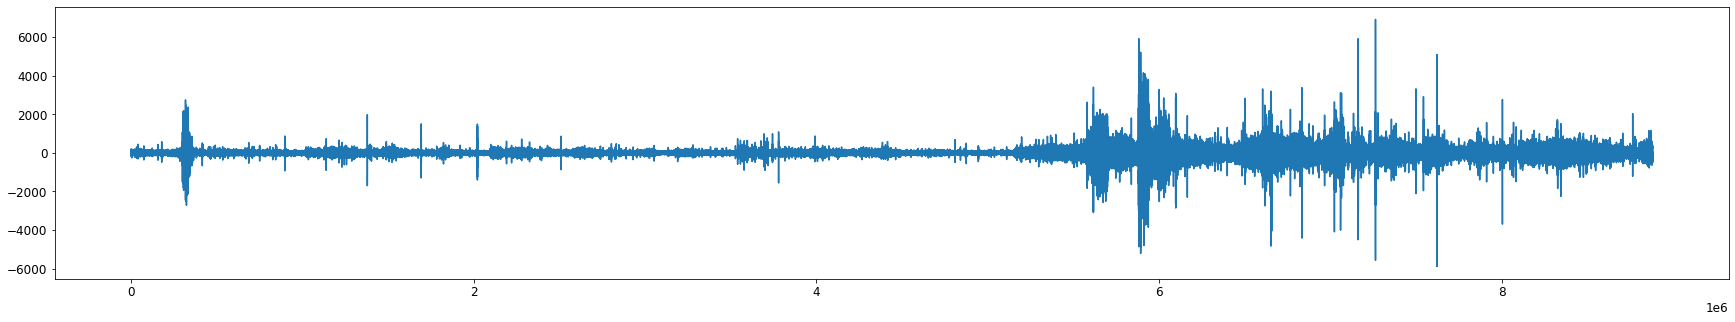

In [102]:
plt.figure(figsize=(30,5))
plt.plot(wf_stack)